# DATASET DESCRIPTION AND VISUALIZATION

# Dataset description

The following dataset, provided in the context of the D-GITT project by RTE (Réseau de Transport d'Électricité), contains the information of several snapshots of the French electric grid. It is formed by around 7.000 buses and 8.000 lines, and contains a complete topological description of all the substations, including a detailed node-breaker topology which is useful to produce different interconnections between busbars and elements connected to a particular voltage level by changing the state of the switches. The following figure is a complete diagram of the grid obtained from one of the snapshots:

<p align="center">
  <img src="network_diagram.svg" alt="Network diagram">
</p>

## Element description

The PowSyBl model contains a collection of different objects that describe all the grid topology:

- **Substations:** These objects represent the physical buildings where all the nodal connection happen. They contain voltage level objects, one or more per substation.
- **Voltage levels:** Each voltage level is defined by a nominal voltage value, as well as its upper and lower limits, with all the elements connected to it having the same nominal values and bounds. Inside a voltage level we can find internal nodes where the different objects of the grid can be connected. All the objects (except dangling lines) have to have its ends (which will be 1 for shunt elements and 2 for branch elements) connected to a voltage level at one of its internal nodes.
- **Switches:** They represent the edges of the internal topology of a voltage level, allowing to connect two different nodes if the position is closed. However, as the name indicates, they can be switched to an open position, disconnecting the two nodes. In the model, there are two main types of switches: **Breakers**, which will automatically respond to overloads by breaking the circuit, and **Disconnectors**, which are operated manually.  
- **Busbars:** In order to interconnect an object with the rest of the grid, they have to share a common connection point. While all the objects connect to a particular node, the different switches will connect them to other nodes, until they reach a node where a busbar is located. These busbars represent the termination point of an element connection at a voltage level. There can be several busbars in a single voltage level, which can be fused or disjointed depending the position of the switches and disconnectors inbetween them. This allows for coupling or decoupling some connections and form different buses. Some elements may reach more than one busbar using different internal paths, although only one of the paths should be closed in order to avoid accidental interconnection of decoupled busbars.
- **Buses:** They are a byproduct of the switching state of a voltage level. A group of interconnected busbars forms a bus, leading to multiple buses for a single voltage level in cases where some busbars are isolated from the others. In a graph representation of the electrical network, they are the nodes, and its variables are the voltage magnitude and angle, which have to follow the voltage level constraints. *Note: When discussing voltage levels, we talked about nodes to refer to their internal topology. Buses are nodes of the broader grid topology.* 
- **Generators:** These objects are defined by the characteristics of the generator unit they represent and they are connected at a given voltage level node. Its variables are the active and reactive power injected, while the defining parameters are its technology, its operational limits, both in active and reactive power, a boolean indicating if they regulate the voltage of the bus they are connected to, and the target values for active power, reactive power and voltage magnitude.
- **Loads:** These objects are also connected to a given voltage level node, and they are defined by the active and reactive power absorbed.
- **Lines:** These objects have two ends, each of them connected to different voltage levels with the same nominal magnitude at a given node. Defined by its electrical parameters (r, x, b, g), and its operational limits, these elements correspond to the edges of the electrical network (along transformers).
- **Transformers:** Similarly to lines, transformers connect two different voltage levels, although with the particularity that they have to be at the same substation, and allowing different nominal values for the two voltage level connected (they still can connect voltage levels with the same nominal values).
- **Shunt compensators:** They are shunt elements of a voltage level, connected to one of its internal nodes, and defined by its electrical parameters (g, b), aswell as the type of model they have, a boolean to determine if they are regulating the voltage level, aswell as the target value of this regulation.
- **Static VAR compensators:** Shunt elements connected to a voltage level internal node, with the property of the regulation mode that allows to control either voltage magnitude or reactive power (or off if they are not active). Its parameters (apart from the regulation mode) are the limits of the electrical parameter *b* and the targets for voltage magnitude and reactive power values.
- **Dangling lines:** They are lines with a single node defined, while the rest of the parameters are the same.
- **Operational limits:** For lines and transformers, the operational limits are defined by selecting at which side the limit is applied (the from or two end of a branch), the type of limit (typically current, although aparent and active power are also possible), the limit value and the acceptable duration. If the acceptable duration is set to -1, it is considered to be a permanent limit, with a maximum of one permanent limit per side and line. Multiple limits can be applied for different acceptable durations if desired.
- **Reactive capability curve points**: To define the limits over the reactive power of a given generator, PowSyBl allows the definition of a user-defined curve by inputing several sequenced points. These points are defined with a value of active power, and an upper and lower bound for the reactive power at that active power value. A curve is formed of at least 2 points.

# Data visualization

The initial figure shows the full network diagram, including all the voltage level. Since the model does not have any information regarding geolocalization of substation, it does not have any shape in particular. Such diagram takes a while to be produced and is difficult to interpret. However, we can see how to produce a diagram of a small fraction of the grid by defining the voltage levels we want to include in the diagram:

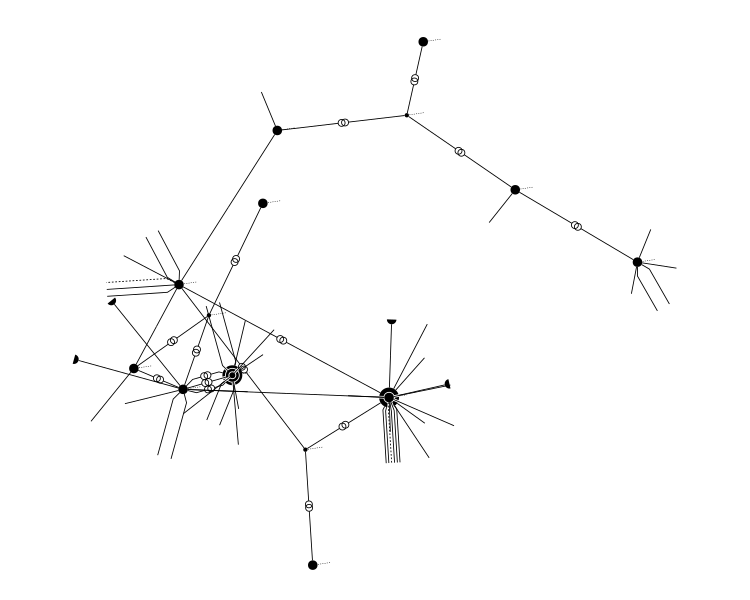

In [12]:
import pypowsybl as pp
from IPython.display import SVG, display 

grid = pp.network.load(file='initial_snapshot.xiidm.bz2')
diagram = grid.get_network_area_diagram(voltage_level_ids=['CORNIP1', 'CORNIP3', 'CORNIP6', 'CORNIP7', '1CORNP7',
                                                            'GEN.PP1', 'GEN.PP6', 'GEN.PP7', '1GEN.P7',
                                                            'FRASNP1', 'FRASNP3', 'FRASNP6', 'FRASNP7', '1FRAS77', ])

display(diagram)
